---
# Generating T-S Plots

Investigating T-S plots for potential use of unsupervised methods to cluster profiler data. This is probably a stretch goal! 

In [2]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import seawater

sns.set_style("whitegrid")

### Load files

In [3]:
profiler_data = pd.read_csv('../../coastal_upwelling_output/profiler_data_2018.csv')

In [4]:
profiler_data['time'] = pd.to_datetime(profiler_data['time'])

In [5]:
# Specify the variable(s) of interest
profiler_var = ['seawater_pressure', 'density', 'practical_salinity', 'seawater_temperature', 'corrected_dissolved_oxygen']

In [6]:
# Specify the units for each variable of interest
profiler_units = {'seawater_pressure': ['dbar'], 'density': ['kg m-3'], 'practical_salinity': ['1'], 'seawater_temperature': ['ºC'], 'corrected_dissolved_oxygen': ['µmol kg-1']}

---
### T-S diagrams

In [7]:
profiler_data

,time,seawater_pressure,density,practical_salinity,seawater_temperature,corrected_dissolved_oxygen
0,2018-07-17 15:38:50.061576192,81.279138,1026.516091,33.675824,8.613400,92.728326
1,2018-07-17 15:38:51.061581824,81.182077,1026.515845,33.675754,8.611768,92.708655
2,2018-07-17 15:38:52.061271552,81.084999,1026.515921,33.676071,8.610009,92.688996
3,2018-07-17 15:38:53.061588992,80.987921,1026.517571,33.678387,8.608188,92.679191
4,2018-07-17 15:38:54.061177344,80.889759,1026.518862,33.680522,8.607749,92.633305
...,...,...,...,...,...,...
13164698,2018-12-31 11:59:55.458120192,61.875097,1025.117886,32.660133,11.666675,258.166072
13164699,2018-12-31 11:59:56.458231296,61.828144,1025.117640,32.660090,11.666675,258.112745
13164700,2018-12-31 11:59:57.458030592,61.794006,1025.117535,32.660169,11.666744,258.100726
13164701,2018-12-31 11:59:58.457932288,61.756694,1025.117198,32.660002,11.666952,258.181654


Text(0.5, 1.0, 'July 18, 2018')

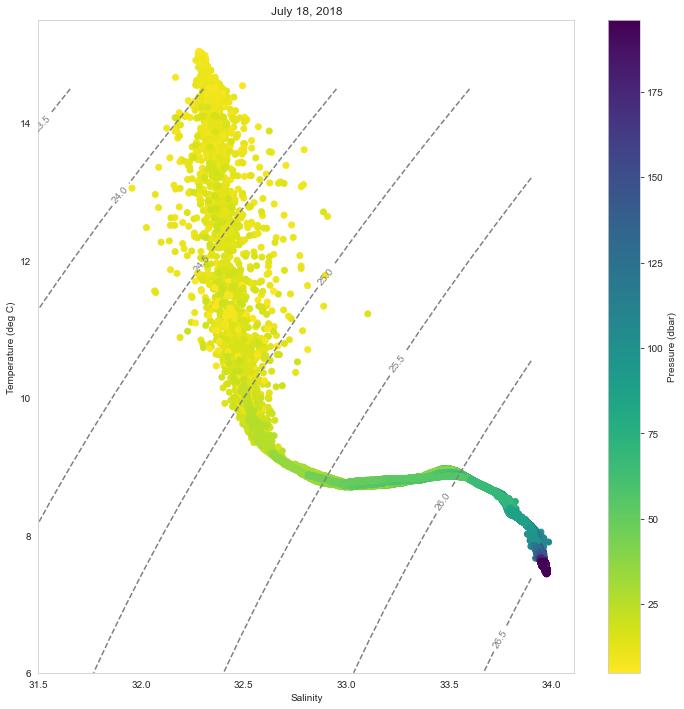

In [8]:
data = profiler_data[(profiler_data['time'].dt.month == 8) & (profiler_data['time'].dt.day == 18)]
plt.figure(figsize=(12,12))

# calculate the density lines - from OOI Argo Float lab
x = np.arange(31.5 ,34, .1)
y = np.arange(6, 15, .5)
X, Y = np.meshgrid(x, y)
Z = seawater.eos80.dens0(X, Y) - 1000

# plot the contours
CS = plt.contour(X, Y, Z, colors='grey', levels=np.arange(20, 30, .5), linestyles='dashed')
plt.clabel(CS, inline=1, fontsize=10, fmt='%0.1f')

plt.scatter(data['practical_salinity'], data['seawater_temperature'], c=data['seawater_pressure'], cmap='viridis_r')
plt.grid()
plt.xlabel('Salinity')
plt.ylabel('Temperature (deg C)')
cbh = plt.colorbar()
cbh.set_label('Pressure (dbar)')
plt.title('July 18, 2018')

This is cool! Can I make time a slider?

Text(0.5, 1.0, 'July 18, 2018')

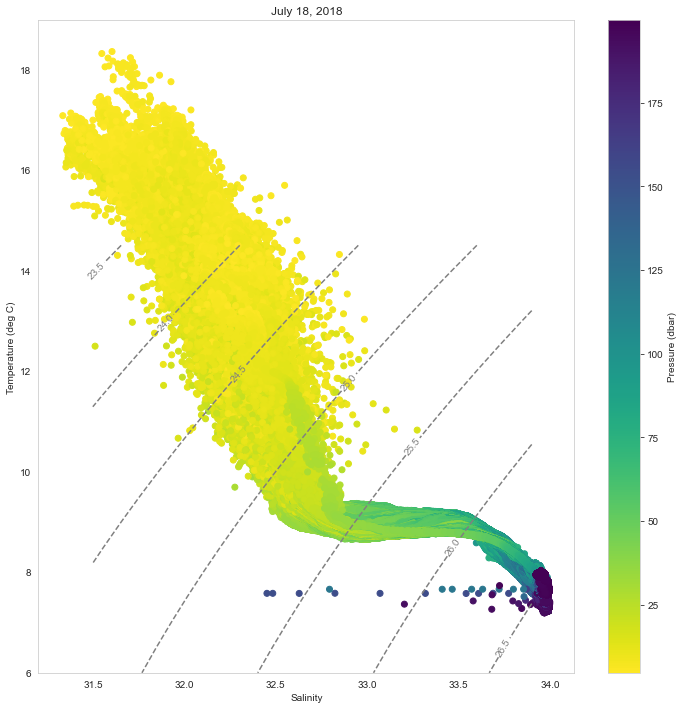

In [9]:
data = profiler_data[(profiler_data['time'].dt.month == 8)]
plt.figure(figsize=(12,12))

# calculate the density lines - from OOI Argo Float lab
x = np.arange(31.5 ,34, .1)
y = np.arange(6, 15, .5)
X, Y = np.meshgrid(x, y)
Z = seawater.eos80.dens0(X, Y) - 1000

# plot the contours
CS = plt.contour(X, Y, Z, colors='grey', levels=np.arange(20, 30, .5), linestyles='dashed')
plt.clabel(CS, inline=1, fontsize=10, fmt='%0.1f')

plt.scatter(data['practical_salinity'], data['seawater_temperature'], c=data['seawater_pressure'], cmap='viridis_r')
plt.grid()
plt.xlabel('Salinity')
plt.ylabel('Temperature (deg C)')
cbh = plt.colorbar()
cbh.set_label('Pressure (dbar)')

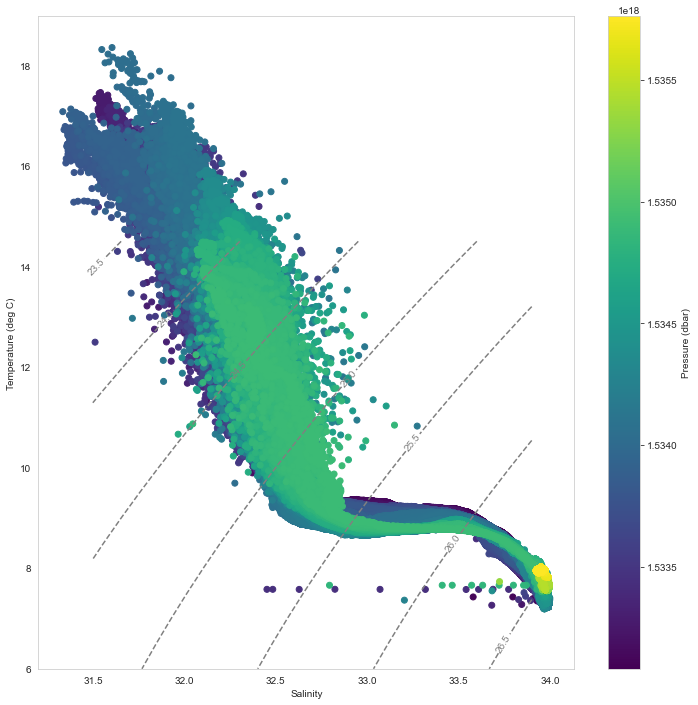

In [19]:
data = profiler_data[(profiler_data['time'].dt.month == 8)]
plt.figure(figsize=(12,12))

# calculate the density lines - from OOI Argo Float lab
x = np.arange(31.5 ,34, .1)
y = np.arange(6, 15, .5)
X, Y = np.meshgrid(x, y)
Z = seawater.eos80.dens0(X, Y) - 1000

# plot the contours
CS = plt.contour(X, Y, Z, colors='grey', levels=np.arange(20, 30, .5), linestyles='dashed')
plt.clabel(CS, inline=1, fontsize=10, fmt='%0.1f')

plt.scatter(data['practical_salinity'], data['seawater_temperature'], c=data['time'], cmap='viridis')
plt.grid()
plt.xlabel('Salinity')
plt.ylabel('Temperature (deg C)')
cbh = plt.colorbar()

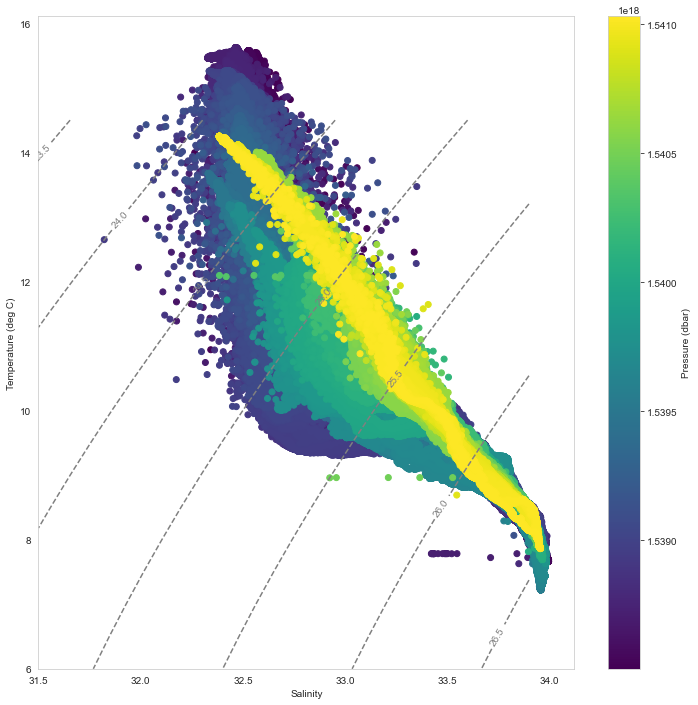

In [21]:
data = profiler_data[(profiler_data['time'].dt.month == 10)]
plt.figure(figsize=(12,12))

# calculate the density lines - from OOI Argo Float lab
x = np.arange(31.5 ,34, .1)
y = np.arange(6, 15, .5)
X, Y = np.meshgrid(x, y)
Z = seawater.eos80.dens0(X, Y) - 1000

# plot the contours
CS = plt.contour(X, Y, Z, colors='grey', levels=np.arange(20, 30, .5), linestyles='dashed')
plt.clabel(CS, inline=1, fontsize=10, fmt='%0.1f')

plt.scatter(data['practical_salinity'], data['seawater_temperature'], c=data['time'], cmap='viridis')
plt.grid()
plt.xlabel('Salinity')
plt.ylabel('Temperature (deg C)')
cbh = plt.colorbar()
cbh.set_label('Pressure (dbar)')

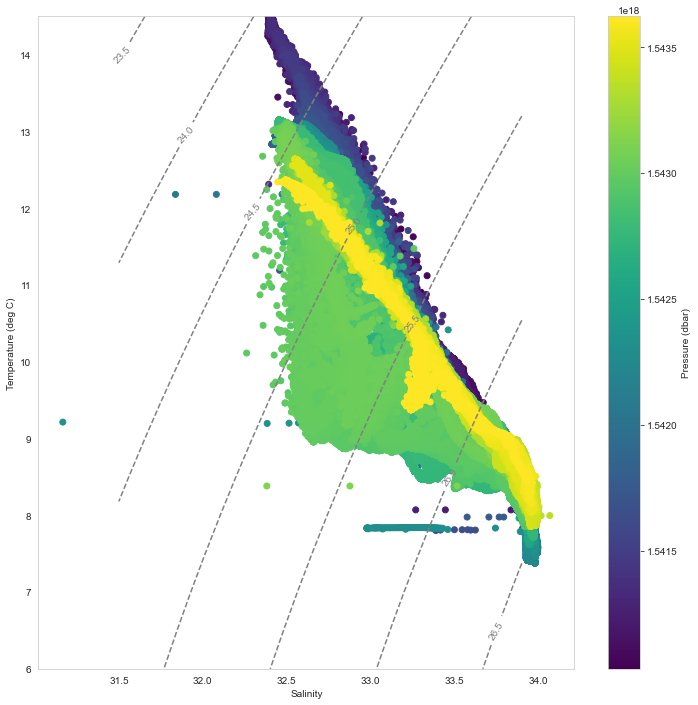

In [22]:
data = profiler_data[(profiler_data['time'].dt.month == 11)]
plt.figure(figsize=(12,12))

# calculate the density lines - from OOI Argo Float lab
x = np.arange(31.5 ,34, .1)
y = np.arange(6, 15, .5)
X, Y = np.meshgrid(x, y)
Z = seawater.eos80.dens0(X, Y) - 1000

# plot the contours
CS = plt.contour(X, Y, Z, colors='grey', levels=np.arange(20, 30, .5), linestyles='dashed')
plt.clabel(CS, inline=1, fontsize=10, fmt='%0.1f')

plt.scatter(data['practical_salinity'], data['seawater_temperature'], c=data['time'], cmap='viridis')
plt.grid()
plt.xlabel('Salinity')
plt.ylabel('Temperature (deg C)')
cbh = plt.colorbar()
cbh.set_label('Pressure (dbar)')